# 📊 Ensemble Voting Classifier on Student Performance Dataset – Academic Performance Prediction
## A Voting Classifier is an ensemble machine learning model that combines predictions from multiple individual models (also called base learners) to make a final prediction. It works on the principle that a group of weak learners can come together to form a strong learner.

## 🎯 Objective:
To classify students into performance categories such as Excellent, Good, and Average based on academic and demographic features using an Ensemble Voting Classifier (combining Logistic Regression, Decision Tree, and K-Nearest Neighbors).

## 📂 Dataset:
Student Performance Dataset (Kaggle), containing features like study time, failures, absences, and family background.
The target variable represents student performance categorized into:

Excellent

Good

Average




In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn


##  1.Load Dataset

In [3]:
df = pd.read_csv("student_performance_dataset (1).csv")
df

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group,Performance
0,Male,High School,Music,Completed,4.7,83.6,B,Excellent
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D,Excellent
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E,Average
3,Male,Master’s Degree,Technology and Computers,NaN,4.9,92.7,E,Excellent
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A,Good
...,...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,NaN,3.7,82.5,C,Good
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A,Excellent
997,Male,Some College,Music,Completed,4.5,95.7,C,Excellent
998,Female,Doctorate,Music,NaN,2.5,66.2,D,Average


## 2. Information about Dataset and Analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          586 non-null    object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


## 3. Data Correction

In [5]:
df["Test Preparation"] = df["Test Preparation"].fillna("unknown")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    1000 non-null   object 
 1   Parental Education Level  1000 non-null   object 
 2   Your Interest             1000 non-null   object 
 3   Test Preparation          1000 non-null   object 
 4   Hours Studied             1000 non-null   float64
 5   Attendance                1000 non-null   float64
 6   Class Group               1000 non-null   object 
 7   Performance               1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


## 4. Separating Independent and Dependent Variable

In [7]:
X = df.iloc[:,0:7]
y = df.iloc[:,-1]

In [8]:
X

,Gender,Parental Education Level,Your Interest,Test Preparation,Hours Studied,Attendance,Class Group
0,Male,High School,Music,Completed,4.7,83.6,B
1,Male,Doctorate,Reading and Literature,Completed,5.0,100.0,D
2,Male,High School,Arts & Creativity,Completed,3.6,72.7,E
3,Male,Master’s Degree,Technology and Computers,unknown,4.9,92.7,E
4,Female,Some College,Sports & Athletics,Completed,3.3,80.4,A
...,...,...,...,...,...,...,...
995,Female,Bachelor’s Degree,Technology and Computers,unknown,3.7,82.5,C
996,Female,Doctorate,Reading and Literature,Completed,5.8,92.1,A
997,Male,Some College,Music,Completed,4.5,95.7,C
998,Female,Doctorate,Music,unknown,2.5,66.2,D


In [9]:
y

0      Excellent
1      Excellent
2        Average
3      Excellent
4           Good
         ...    
995         Good
996    Excellent
997    Excellent
998      Average
999      Average
Name: Performance, Length: 1000, dtype: object

## 5. Encoding the Target Variable

In [10]:
from sklearn.preprocessing import LabelEncoder
v = LabelEncoder()

In [11]:
h = v.fit_transform(y)

In [12]:
h

array([2, 2, 0, 2, 3, 0, 0, 1, 1, 1, 3, 1, 0, 0, 0, 3, 1, 3, 0, 0, 2, 3,
       1, 3, 3, 0, 3, 3, 1, 3, 0, 1, 3, 0, 3, 2, 3, 1, 0, 1, 3, 3, 0, 3,
       0, 2, 0, 0, 2, 0, 1, 1, 3, 2, 3, 1, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 0, 2, 1, 2, 1, 3, 0, 0, 3, 2, 0, 0, 2, 3, 2, 0, 0, 0, 2,
       3, 2, 0, 0, 3, 2, 1, 0, 3, 0, 0, 1, 3, 2, 4, 3, 2, 3, 2, 3, 0, 0,
       2, 0, 0, 0, 3, 0, 0, 2, 1, 3, 1, 3, 0, 1, 2, 0, 2, 1, 2, 2, 0, 4,
       0, 2, 0, 2, 2, 0, 3, 0, 2, 3, 2, 3, 3, 0, 0, 3, 2, 3, 0, 2, 3, 3,
       0, 0, 3, 2, 2, 0, 2, 3, 1, 2, 2, 0, 3, 2, 1, 3, 0, 0, 0, 1, 1, 2,
       3, 0, 0, 3, 2, 3, 0, 3, 0, 3, 2, 2, 3, 2, 1, 1, 0, 2, 0, 0, 0, 3,
       1, 3, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2, 2, 0, 3, 0, 3, 4, 3, 2, 3, 1,
       2, 1, 1, 3, 1, 3, 0, 0, 1, 1, 2, 0, 3, 3, 0, 1, 0, 2, 3, 2, 0, 1,
       1, 1, 2, 3, 0, 2, 0, 1, 2, 0, 1, 0, 0, 3, 0, 3, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 0, 0, 2, 3, 2, 1, 2, 0, 3, 2, 3, 1, 3, 2, 0, 2, 1, 1, 2,
       0, 3, 3, 0, 3, 2, 2, 0, 3, 3, 3, 2, 0, 0, 3,

## 6. Necessary Algorithms import from Sklearn Library

In [13]:
from sklearn.preprocessing import OrdinalEncoder ,MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



## 7. Separating Numerical columns, Categorical columns and Order columns 

In [14]:
numeric_cols = ["Hours Studied","Attendance"]
categoric_cols = ["Gender","Your Interest","Test Preparation","Class Group"]
ordinal_cols = ["Parental Education Level"]

In [15]:
X["Parental Education Level"].nunique

<bound method IndexOpsMixin.nunique of 0            High School
1              Doctorate
2            High School
3        Master’s Degree
4           Some College
             ...        
995    Bachelor’s Degree
996            Doctorate
997         Some College
998            Doctorate
999    Bachelor’s Degree
Name: Parental Education Level, Length: 1000, dtype: object>

In [16]:
education_categories = [["High School","Some College","Bachelor’s Degree","Master’s Degree","Doctorate","Associate Degree"]]

## 7. Make Object of the Encoders

In [17]:
ordinal = OrdinalEncoder(categories=education_categories)
numeric_scaling= MinMaxScaler()
onehot = OneHotEncoder(handle_unknown="ignore",drop="first")

## 8. Applying ColumnTransformer 

In [18]:
preprocessor = ColumnTransformer(
    [('scaling',numeric_scaling,numeric_cols),
     ('onehot',onehot,categoric_cols),
      ('ordinal',ordinal,ordinal_cols)])
    

## 9. Make object of the Algorithms

In [19]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

In [20]:
voting_estimators = VotingClassifier(
    [('dt',dt),
     ('rf',rf),
     ('svc',svc)],voting='hard')
    

## 10. using Pipeline

In [21]:
pipe = Pipeline(
    [('preprocessor',preprocessor),
     ('voting',voting_estimators)]
)

## 11. Applying GridSearcv

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'voting__dt__max_depth': [5, 10],
    'voting__dt__min_samples_split': [5, 10],
    # Random Forest
    'voting__rf__n_estimators': [50, 100],
    'voting__rf__max_depth': [5, 10],
    # SVC (Support Vector Classifier)
    'voting__svc__C': [1, 10],
    'voting__svc__kernel': ['linear']
}

In [23]:
grid_Search = GridSearchCV(estimator=pipe,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=1,verbose=2)

In [ ]:
grid_Search.fit(X,h)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END voting__dt__max_depth=5, voting__dt__min_samples_split=5, voting__rf__max_depth=5, voting__rf__n_estimators=50, voting__svc__C=1, voting__svc__kernel=linear; total time=   0.2s
[CV] END voting__dt__max_depth=5, voting__dt__min_samples_split=5, voting__rf__max_depth=5, voting__rf__n_estimators=50, voting__svc__C=1, voting__svc__kernel=linear; total time=   0.2s
[CV] END voting__dt__max_depth=5, voting__dt__min_samples_split=5, voting__rf__max_depth=5, voting__rf__n_estimators=50, voting__svc__C=1, voting__svc__kernel=linear; total time=   0.1s
[CV] END voting__dt__max_depth=5, voting__dt__min_samples_split=5, voting__rf__max_depth=5, voting__rf__n_estimators=50, voting__svc__C=1, voting__svc__kernel=linear; total time=   0.1s
[CV] END voting__dt__max_depth=5, voting__dt__min_samples_split=5, voting__rf__max_depth=5, voting__rf__n_estimators=50, voting__svc__C=1, voting__svc__kernel=linear; total time=   0.1s
[CV] END

In [36]:
print("Best Parameters:", grid_Search.best_params_)
print("Best CV Accuracy:", grid_Search.best_score_)

Best Parameters: {'voting__dt__max_depth': 10, 'voting__dt__min_samples_split': 5, 'voting__rf__max_depth': 10, 'voting__rf__n_estimators': 50, 'voting__svc__C': 10, 'voting__svc__kernel': 'linear'}
Best CV Accuracy: 0.9359999999999999


In [37]:
from sklearn.tree import plot_tree

In [38]:
best_pipe = grid_Search.best_estimator_

In [39]:
best_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling', MinMaxScaler(),
                                                  ['Hours Studied',
                                                   'Attendance']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Your Interest',
                                                   'Test Preparation',
                                                   'Class Group']),
                                                 ('ordinal',
                                                  OrdinalEncoder(categories=[['High '
                                                                              'School',
                                                                              'Some '
                                                                              'College',
                                                                              'Bachelor’s '
                                                                              'Degree',
                                                                              'Master’s '
                                                                              'Degree',
                                                                              'Doctorate',
                                                                              'Associate '
                                                                              'Degree']]),
                                                  ['Parental Education '
                                                   'Level'])])),
                ('voting',
                 VotingClassifier(estimators=[('dt',
                                               DecisionTreeClassifier(max_depth=10,
                                                                      min_samples_split=5)),
                                              ('rf',
                                               RandomForestClassifier(max_depth=10,
                                                                      n_estimators=50)),
                                              ('svc',
                                               SVC(C=10, kernel='linear'))]))])

In [40]:
voting = best_pipe.named_steps['voting']

In [41]:
voting

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=10,
                                                     min_samples_split=5)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=50)),
                             ('svc', SVC(C=10, kernel='linear'))])

## 12. best estimator of decision tree

In [42]:
dt_model = grid_Search.best_estimator_.named_steps['voting'].estimators_[0]

In [43]:
dt_model

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

## 13. Classification Report

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = grid_Search.predict(X)
print(classification_report(h, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       321
           1       1.00      0.99      1.00       136
           2       1.00      1.00      1.00       258
           3       1.00      1.00      1.00       267
           4       1.00      1.00      1.00        18

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [45]:
print(X.shape)
print(X.columns)


(1000, 7)
Index(['Gender', 'Parental Education Level', 'Your Interest',
       'Test Preparation', 'Hours Studied', 'Attendance', 'Class Group'],
      dtype='object')


## 14. Use PCA for dimensionality reduction means high dimensional data into small dimensional data and plot Decision Boundary Line 

In [ ]:
from sklearn.decomposition import PCA
# Full pipeline ke output ko 2D mein reduce karo (for plotting)
X_transformed = pipe.named_steps['preprocessor'].fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_transformed)
# Model ko train karo transformed data pe
pipe.named_steps['voting'].fit(X_transformed, h)
# Grid banake prediction lo
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
from sklearn.neighbors import KNeighborsClassifier
approx_model = KNeighborsClassifier(n_neighbors=5)
approx_model.fit(X_pca, h)
Z = approx_model.predict(grid).reshape(xx.shape)
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=h, edgecolor='k', cmap='coolwarm')
plt.title("PCA Projection of Full Pipeline - Approximate Decision Boundary")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
import matplotlib.patches as mpatches
class_labels = v.classes_
colors = [plt.cm.coolwarm(i / (len(class_labels)-1)) for i in range(len(class_labels))]
patches = [mpatches.Patch(color=colors[i], label=class_labels[i]) for i in range(len(class_labels))]
plt.legend(handles=patches, title="Performance", loc="upper right")
plt.show()


## Exploratory Data Analysis

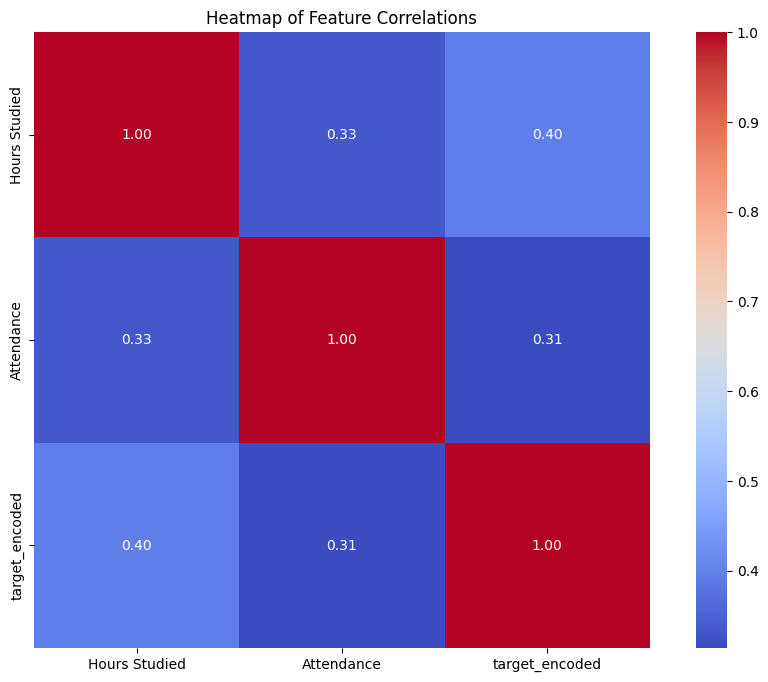

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
df_plot = df.copy()
df_plot["target_encoded"] = h

# 1. 🔥 Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))
corr_matrix = df_plot.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap of Feature Correlations")
plt.show()




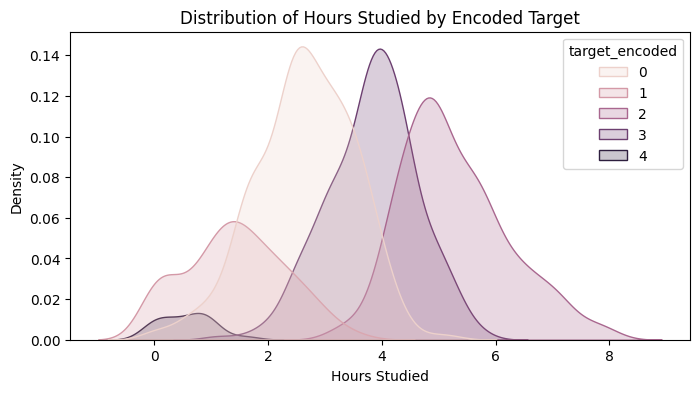

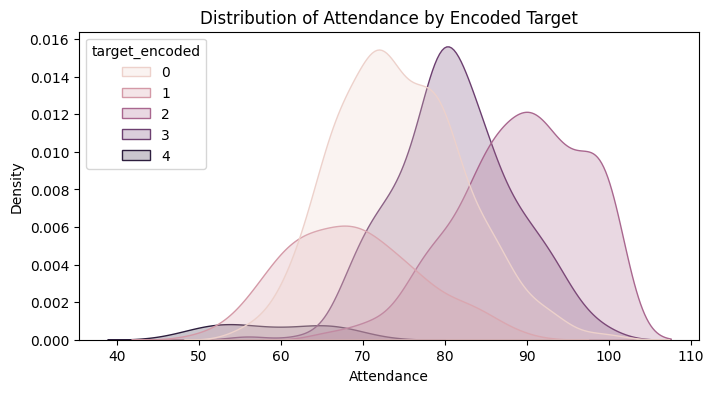

In [55]:
# 2. 📊 Feature Distribution by Encoded Target Class
features = df_plot.select_dtypes(include=["float", "int"]).columns
features = [col for col in features if col != "target_encoded"]
for col in features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df_plot, x=col, hue="target_encoded", fill=True)
    plt.title(f"Distribution of {col} by Encoded Target")
    plt.show()



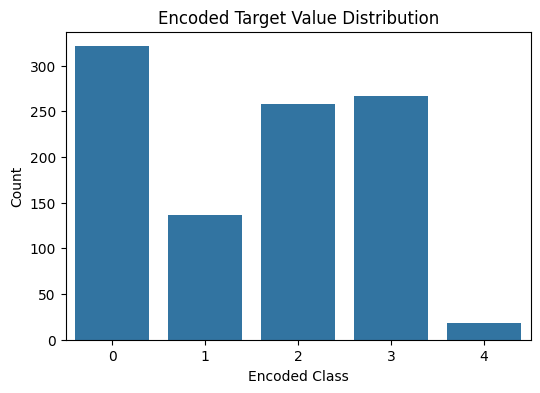

In [53]:
# 3. 📈 Target Value Distribution (Encoded)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_plot, x="target_encoded")
plt.title("Encoded Target Value Distribution")
plt.xlabel("Encoded Class")
plt.ylabel("Count")
plt.show()

## 15. plot decision boundary line using two features which is Hours Studied and Attendence

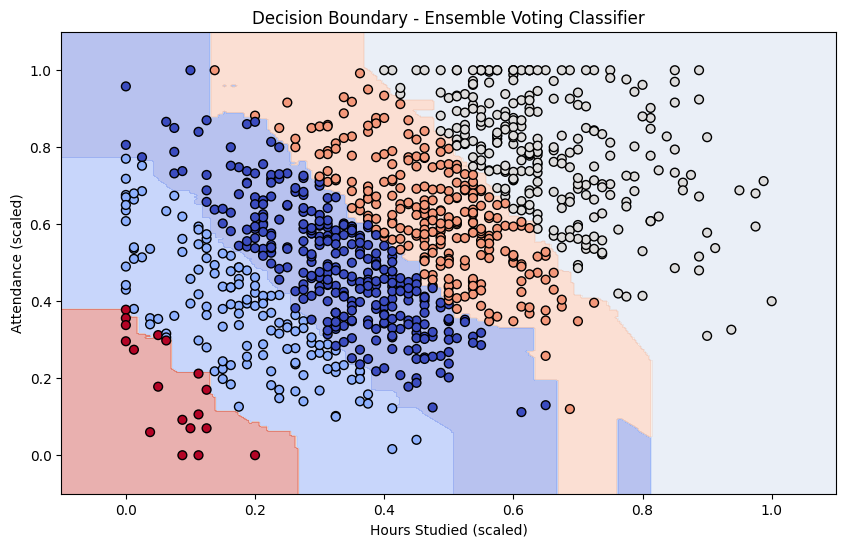

In [102]:
X_vis = df[["Hours Studied", "Attendance"]]
y_vis = h  
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_vis)
model = VotingClassifier([
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True))
], voting='hard')

model.fit(X_scaled, y_vis)

# Plotting decision boundary
x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, s=40, edgecolor='k', cmap='coolwarm')
plt.xlabel("Hours Studied (scaled)")
plt.ylabel("Attendance (scaled)")
plt.title("Decision Boundary - Ensemble Voting Classifier")
plt.show()

## 16. using joblib to save model 

In [49]:
import joblib
joblib.dump(pipe, 'ensemble model2.pkl')

['ensemble model2.pkl']